In [55]:
import pandas as pd
from scipy.stats import f_oneway
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [56]:
train_data_all = pd.read_csv('data/train_data_all.csv')
train_data_condo = pd.read_csv('data/train_data_condo.csv')

In [57]:
train_data_condo

,Borough,Total Units,Age,Has Elevator,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value
0,2,16,7.0,1,21861.0,410331.0,189972.0,220359.0,1582000.0
1,3,12,9.0,0,24547.0,420981.0,234915.0,186066.0,1380000.0
2,1,6,112.0,0,3800.0,106932.0,36936.0,69996.0,528000.0
3,2,45,23.0,1,63738.0,1082271.0,602961.0,479310.0,3611000.0
4,1,13,7.0,0,24091.0,1015677.0,221396.0,794281.0,6056002.0
...,...,...,...,...,...,...,...,...,...
7995,3,30,15.0,0,34103.0,778571.0,306586.0,471985.0,3718998.0
7996,3,34,92.0,1,36973.0,931574.0,279158.0,652416.0,4956000.0
7997,3,23,10.0,1,29086.0,623022.0,175970.0,447052.0,3484007.0
7998,3,12,26.0,1,15000.0,270150.0,118050.0,152100.0,1143000.0


# Chi-sq test between Borough and Has Elevator

In [58]:
import scipy.stats as stats

# Chi-Square test for independence between Borough and Has Elevator
contingency_table = pd.crosstab(train_data_condo['Borough'], train_data_condo['Has Elevator'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-square test for Borough and Has Elevator:')
print(f'  - Chi2: {chi2}')
print(f'  - p-value: {p}')

if p < 0.05:
    print("    Result: Reject the null hypothesis - There is a significant association.")
else:
    print("    Result: Fail to reject the null hypothesis - No significant association.")
print('\n')

Chi-square test for Borough and Has Elevator:
  - Chi2: 372.0403964821635
  - p-value: 3.050302385384318e-79
    Result: Reject the null hypothesis - There is a significant association.




# One-Way ANOVA

Borough:
1=Manhattan, 2=The Bronx, 3=Brooklyn, 4=Queens, 5=Staten Island.

Has Elevator:
0=Walk-Up, 1=Elevator

In [59]:
oneway_borough_data = train_data_condo[['Borough', 'Full Market Value']]
print(oneway_borough_data['Borough'].unique())

# Group the Full Market Value by Borough
borough_groups = oneway_borough_data.groupby('Borough')['Full Market Value'].apply(list)

# Prepare the data for one-way ANOVA
anova_data_borough = [values for values in borough_groups]

F_stat, p_value = f_oneway(*anova_data_borough)

alpha = 0.05
print(f'One-way ANOVA p-value: {p_value:.2f}')
print(f'One-way ANOVA statistic: {F_stat:.2f}')

if p_value < alpha:
    print("Reject the null hypothesis - There are significant differences between market values for condos with and without elevators.")
else:
    print("Fail to reject the null hypothesis - No significant differences between the market values for condos with and without elevators.")

[2 3 1 4 5]
One-way ANOVA p-value: 0.00
One-way ANOVA statistic: 432.60
Reject the null hypothesis - There are significant differences between market values for condos with and without elevators.


In [60]:
stacked_data = oneway_borough_data.copy()
stacked_data = stacked_data.reset_index().rename(columns={'index': 'id', 'Borough': 'Group', 'Full Market Value': 'Value'})

# Applying Tukey multiple comparison test
MultiComp = MultiComparison(stacked_data['Value'], stacked_data['Group'])
tukey_results = MultiComp.tukeyhsd()
print(tukey_results.summary())

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj      lower         upper     reject
---------------------------------------------------------------------
     1      2 -4544656.2868    0.0  -5385245.879 -3704066.6945   True
     1      3  -5125486.368    0.0  -5492279.328  -4758693.408   True
     1      4 -4901828.8246    0.0 -5339872.6043 -4463785.0449   True
     1      5 -5105220.5781    0.0 -7110298.8655 -3100142.2908   True
     2      3  -580830.0812  0.323 -1419535.3956   257875.2332  False
     2      4  -357172.5378 0.7975 -1229394.9188   515049.8431  False
     2      5  -560564.2913 0.9534  -2702812.752  1581684.1694  False
     3      4   223657.5434 0.6246  -210759.4162    658074.503  False
     3      5    20265.7899    1.0 -1984023.2811  2024554.8609  False
     4      5  -203391.7535 0.9988 -2221935.7728  1815152.2658  False
---------------------------------------------------------------------


C:\Users\youss\AppData\Local\Temp\ipykernel_4324\3487035520.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oneway_borough_data['Borough'] = oneway_borough_data['Borough'].map(borough_mapping)


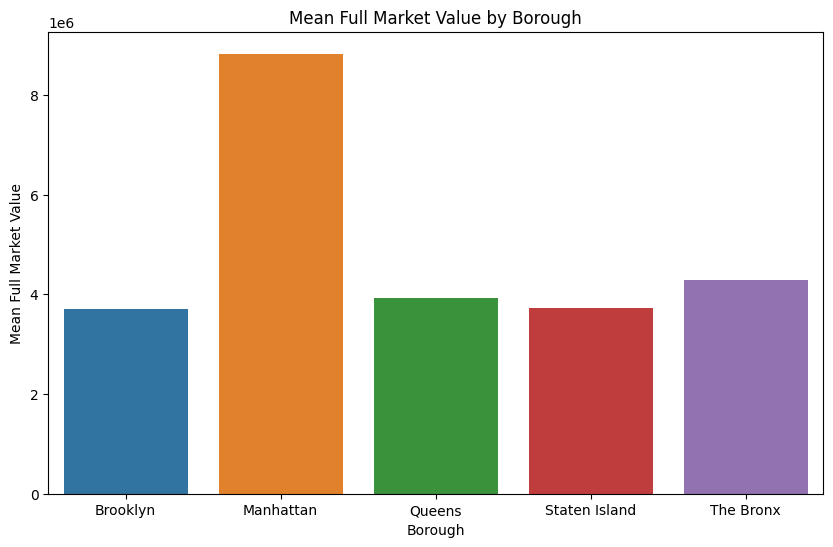

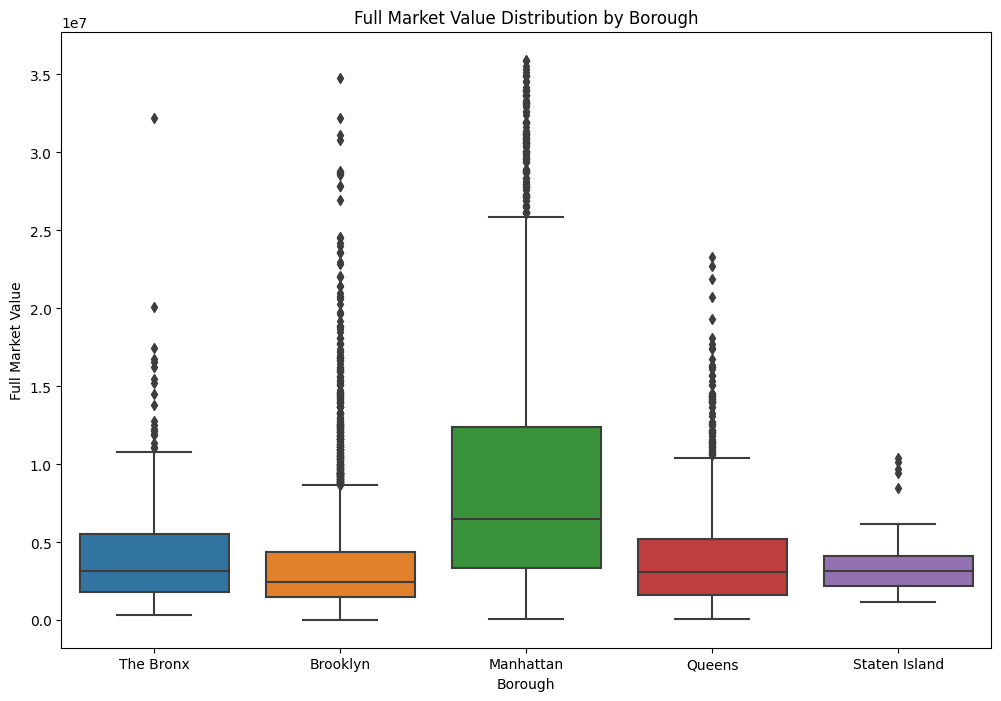

In [61]:
# Create a mapping dictionary for boroughs
borough_mapping = {
    1: 'Manhattan',
    2: 'The Bronx',
    3: 'Brooklyn',
    4: 'Queens',
    5: 'Staten Island'
}

# Apply the mapping to the 'Borough' column
oneway_borough_data['Borough'] = oneway_borough_data['Borough'].map(borough_mapping)

# Calculate the mean Full Market Value for each borough
mean_values = oneway_borough_data.groupby('Borough')['Full Market Value'].mean().reset_index()

# Create a bar plot to visualize the mean Full Market Value for each borough
plt.figure(figsize=(10, 6))
sns.barplot(x='Borough', y='Full Market Value', data=mean_values)
plt.title('Mean Full Market Value by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean Full Market Value')
plt.show()

# Create a box plot to visualize the distribution of Full Market Value for each borough
plt.figure(figsize=(12, 8))
sns.boxplot(x='Borough', y='Full Market Value', data=oneway_borough_data)
plt.title('Full Market Value Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Full Market Value')
plt.show()

In [62]:
oneway_elevator_data = train_data_condo[['Has Elevator', 'Full Market Value']]
print(oneway_elevator_data['Has Elevator'].unique())

# Group the Full Market Value by Borough
elevator_groups = oneway_elevator_data.groupby('Has Elevator')['Full Market Value'].apply(list)

# Prepare the data for one-way ANOVA
anova_data_elevator = [values for values in elevator_groups]

F_stat, p_value = f_oneway(*anova_data_elevator)

alpha = 0.05
print(f'One-way ANOVA p-value: {p_value:.2f}')
print(f'One-way ANOVA statistic: {F_stat:.2f}')

if p_value < alpha:
    print("Reject the null hypothesis - There are significant differences between the borough market values.")
else:
    print("Fail to reject the null hypothesis - No significant differences between the borough market values.")

[1 0]
One-way ANOVA p-value: 0.00
One-way ANOVA statistic: 746.63
Reject the null hypothesis - There are significant differences between the borough market values.


In [63]:
stacked_data = oneway_elevator_data.copy()
stacked_data = stacked_data.reset_index().rename(columns={'index': 'id', 'Has Elevator': 'Group', 'Full Market Value': 'Value'})

# Applying Tukey multiple comparison test
MultiComp = MultiComparison(stacked_data['Value'], stacked_data['Group'])
tukey_results = MultiComp.tukeyhsd()
print(tukey_results.summary())

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
group1 group2    meandiff   p-adj     lower         upper     reject
--------------------------------------------------------------------
     0      1 -4155105.7773   0.0 -4453193.6916 -3857017.8629   True
--------------------------------------------------------------------


ANOVA Results: F-statistic = 105.87063053670573, p-value = 3.339120234751685e-68
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
group1 group2   meandiff   p-adj     lower        upper     reject
------------------------------------------------------------------
  Apt1   Apt2  -137190.674 0.2271 -322482.5779   48101.2299  False
  Apt1   Apt3 -334860.7396    0.0 -520152.6435 -149568.8358   True
  Apt1  Condo  855469.3948    0.0  670177.4909 1040761.2986   True
  Apt2   Apt3 -197670.0656 0.0312 -382961.9695  -12378.1618   True
  Apt2  Condo  992660.0687    0.0  807368.1649 1177951.9726   True
  Apt3  Condo 1190330.1344    0.0 1005038.2305 1375622.0382   True
------------------------------------------------------------------


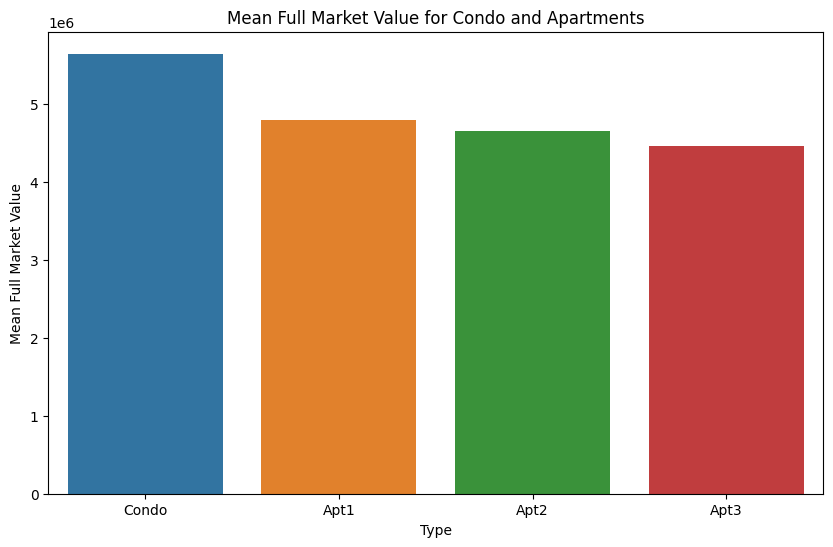

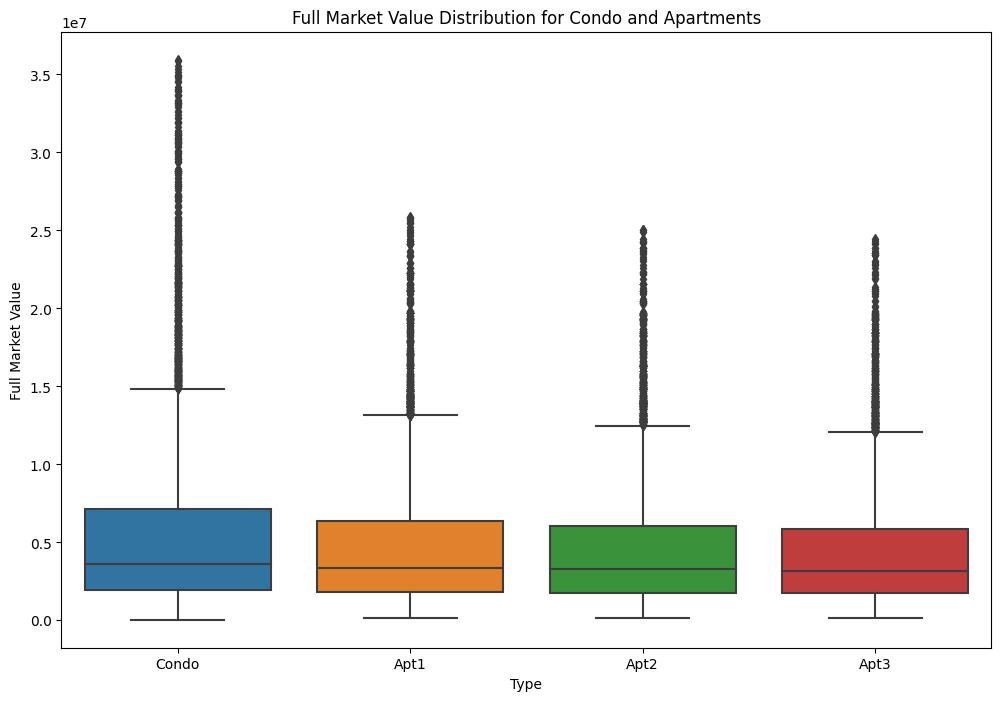

In [64]:
# Filter relevant columns
oneway_apartment_data = train_data_all[['Full Market Value', 'Full Market Value 1', 'Full Market Value 2', 'Full Market Value 3']]

# Rename columns for clarity
oneway_apartment_data.columns = ['Condo', 'Apt1', 'Apt2', 'Apt3']

# Applying one-way ANOVA
anova_results = f_oneway(oneway_apartment_data['Condo'], oneway_apartment_data['Apt1'], oneway_apartment_data['Apt2'], oneway_apartment_data['Apt3'])
print(f"ANOVA Results: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}")

# Stacking the data for the Tukey comparison test
stacked_data = oneway_apartment_data.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id', 'level_1': 'Type', 0: 'Value'})

# Applying Tukey multiple comparison test
MultiComp = MultiComparison(stacked_data['Value'], stacked_data['Type'])
tukey_results = MultiComp.tukeyhsd()
print(tukey_results.summary())

# Create a bar plot to visualize the mean Full Market Value for each type
mean_values = oneway_apartment_data.mean().reset_index()
mean_values.columns = ['Type', 'Mean Full Market Value']

plt.figure(figsize=(10, 6))
sns.barplot(x='Type', y='Mean Full Market Value', data=mean_values)
plt.title('Mean Full Market Value for Condo and Apartments')
plt.xlabel('Type')
plt.ylabel('Mean Full Market Value')
plt.show()

# Create a box plot to visualize the distribution of Full Market Value for each type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Type', y='Value', data=stacked_data)
plt.title('Full Market Value Distribution for Condo and Apartments')
plt.xlabel('Type')
plt.ylabel('Full Market Value')
plt.show()

# Two-Way ANOVA between Borough, Has Elevator, and Full Market Value as the response

In [65]:
twoway_elevator_borough_data = train_data_condo[['Borough', 'Has Elevator', 'Full Market Value']]

# Convert 'Borough' and 'Has Elevator' to categorical variables
twoway_elevator_borough_data['Borough'] = twoway_elevator_borough_data['Borough'].astype('category')
twoway_elevator_borough_data['Has Elevator'] = twoway_elevator_borough_data['Has Elevator'].astype('category')

# Define the model and fit it
model = ols('Q("Full Market Value") ~ C(Borough) + C(Q("Has Elevator")) + C(Borough):C(Q("Has Elevator"))', data=twoway_elevator_borough_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

C:\Users\youss\AppData\Local\Temp\ipykernel_4324\3100247392.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoway_elevator_borough_data['Borough'] = twoway_elevator_borough_data['Borough'].astype('category')
C:\Users\youss\AppData\Local\Temp\ipykernel_4324\3100247392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoway_elevator_borough_data['Has Elevator'] = twoway_elevator_borough_data['Has Elevator'].astype('category')


,sum_sq,df,F,PR(>F)
C(Borough),3.561674e+16,4.0,353.074603,2.417477e-280
"C(Q(""Has Elevator""))",1.125135e+16,1.0,446.146061,2.073772e-96
"C(Borough):C(Q(""Has Elevator""))",3.687218e+15,4.0,36.551999,2.514184e-30
Residual,2.014997e+17,7990.0,NaN,NaN


Correlation between Age and Full Market Value

Correlation between Full Market Value and Age: 0.10783709815606789


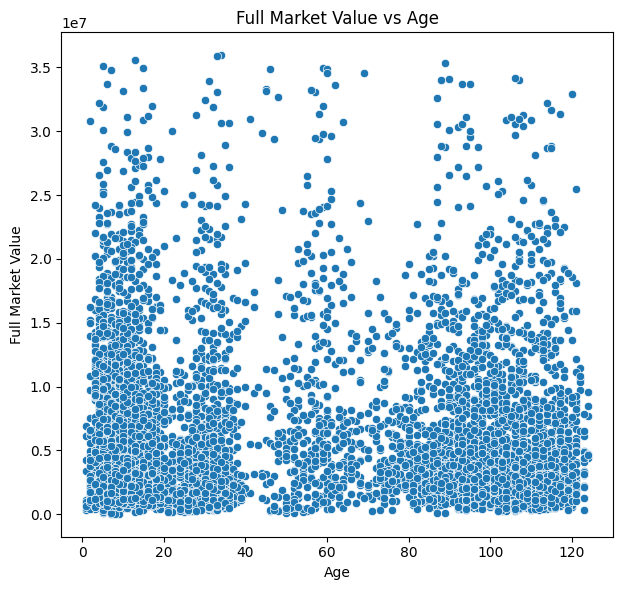

In [66]:
correlation_age = train_data_condo['Full Market Value'].corr(train_data_condo['Age'])
print(f"Correlation between Full Market Value and Age: {correlation_age}")

# Create scatter plots to visualize the relationships
plt.figure(figsize=(12, 6))

# Scatter plot for Full Market Value vs Age
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Full Market Value', data=train_data_condo)
plt.title('Full Market Value vs Age')
plt.xlabel('Age')
plt.ylabel('Full Market Value')

plt.tight_layout()
plt.show()